<a target="_blank" href="https://colab.research.google.com/github/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/notebook/Example3_Nonlinear_Star_Polymer_Ensemble_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# @title Copyright & License (click to expand)

#MIT License

#Copyright (c) 2023 olsenlabmit

#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.

# Download the necessary local functions, tables, and dataset

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1DQ6e2Sgi4VlrA47KPYltN8zOJAvKt-jH?usp=sharing -O .

Retrieving folder list
Retrieving folder 1y8WkEeK5TmfETggrRyh5QFeyLOt1AMkU dataset
Retrieving folder 1N1CMgZsatgNQQWQm_r22G0q_vDHYAAPD Example1
Retrieving folder 1W2VPS3-ho_FQwF0y-R0nG7U-wxWd_lFz Ensemble_P
Processing file 14xH4Z1WczHGv8N8aw0RQy0pMUstgkC1X p1_graph.txt
Processing file 1iLvUezZgJSVmzFCzjnZY0J3NWWf5ab5i p2_graph.txt
Retrieving folder 1oUsv9K7PxWC75w5DZmnF_70sL9cG5z25 Ensemble_Q
Processing file 1xlpCSJHciMvPiWVMpvH31OA_4cRKGYm5 q1_graph.txt
Processing file 1vKMfC7XSuyLU8igAl6H6oMzRc1cKDN7j q2_graph.txt
Retrieving folder 18ILq0de8AyYf8gqWWt7-fJrMivHDg1JI Example3
Retrieving folder 1Etb9fDQJHNECgjhNJ7INWGiuhj5sdsIL SP_GED
Processing file 1KDS7Lu-ni_1me0GXFqZQhAIMa36I-mNo SP1_SP2_GED.npy
Processing file 1OpZdG7nwuWzQg8wM1TmkEos6skXoiqQs SP1_SP3_GED.npy
Processing file 1DIgppg1KwcE28aYr7JH16kzHc4Xv2F7u SP1_SP4_GED.npy
Processing file 1yq40E9kOXoPXe99mCWGx45mWhDWGFbGV SP1_SP5_GED.npy
Processing file 1RKEyfIAbz60IoCYxQYjyQ6GQgGeo3--8 SP1_SP6_GED.npy
Processing file 1r_nxNuoIhfb

# Import the required library

In [14]:
import random
import numpy as np
import shutil
import sys
import os.path
import json
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


if not shutil.which("rdkit"):
    !pip install -q rdkit

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

if not shutil.which("grakel"):
    !pip install grakel

if not shutil.which("dgl"):
    !pip install dgl

if not shutil.which("umap"):
    !pip install umap-learn

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert shutil.which("pyomo")

from pyomo.environ import *

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert shutil.which("cbc") or os.path.isfile("cbc")

from utils.load_networkx import networkx_feat
from utils import macro_unsupervised as unsup
from utils import plot

print("Import Library Done!")

Import Library Done!


# Load the Ensembles of Example 3




In [3]:
Ensemble_SP1 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP1/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP1_weight = np.load("./dataset/Example3/SP1/weight_analytic.npy")

Ensemble_SP2 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP2/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP2_weight = np.load("./dataset/Example3/SP2/weight_analytic.npy")

Ensemble_SP3 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP3/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP3_weight = np.load("./dataset/Example3/SP3/weight_analytic.npy")

Ensemble_SP4 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP4/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP4_weight = np.load("./dataset/Example3/SP4/weight_analytic.npy")

Ensemble_SP5 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP5/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP5_weight = np.load("./dataset/Example3/SP5/weight_analytic.npy")

Ensemble_SP6 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP6/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP6_weight = np.load("./dataset/Example3/SP6/weight_analytic.npy")


Ensemble_SP7 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP7/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP7_weight = np.load("./dataset/Example3/SP7/weight_analytic.npy")

Ensemble_SP8 = networkx_feat(
    TXT_DATA_PATH = './dataset/Example3/SP8/',
    MON_SMILES= './tables/SMILES_monomer.txt',
    FEAT = 'fp',
    FP_RADIUS_MON = 2,
    FP_BITS_MON = 2048,
)

Ensemble_SP8_weight = np.load("./dataset/Example3/SP8/weight_analytic.npy")

# Visualize Ensembles

In [4]:
def sortFunc(index):
  return int(index[4:])

def visualize_ensemble(ensemble, ensemble_weight):
  ensemble_indexs = list(ensemble.keys())
  ensemble_indexs.sort(key=sortFunc)

  for i in range(0, len(ensemble_indexs)):
    plt.figure()
    plot.graph(ensemble[ensemble_indexs[i]])
    print("weight for", ensemble_indexs[i], " =",ensemble_weight[i] )


## Visualize Ensemble SP-1

{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1'}
weight for GBID1  = 0.015625
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1'}
weight for GBID2  = 0.09375
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1'}
weight for GBID3  = 0.046875
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1'}
weight for GBID4  = 0.1875
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1'}
weight for GBID5  = 0.1875
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1', 7: 'RX1'}
weight for GBID6  = 0.046875
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1'}
weight for GBID7  = 0.125
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1', 7: 'RX1'}
weight for GBID8  = 0.1875
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1', 7: 'RX1', 8: 'RX1'}
weight for GBID9  = 0.09375
{0: 'EX1', 1: 'RX1', 2: 'RX1', 3: 'RX1', 4: 'RX1', 5: 'RX1', 6: 'RX1', 7: 'RX1', 8: 'RX1', 9: 'RX1'}
weight for GBID10  = 0.015625


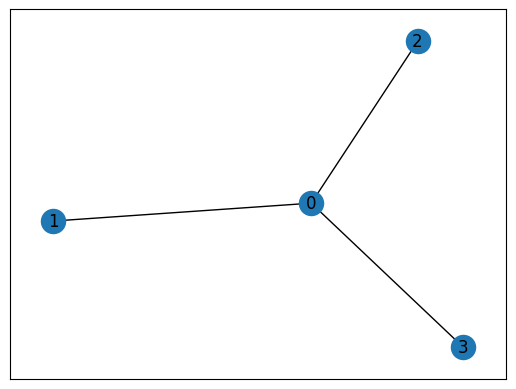

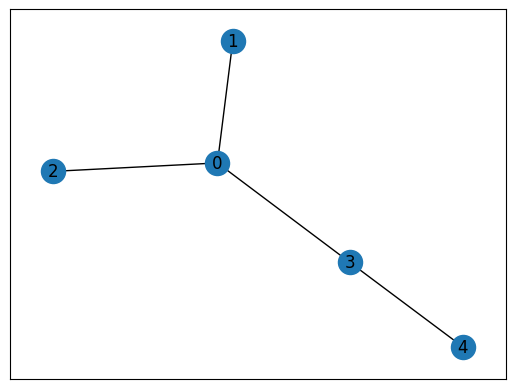

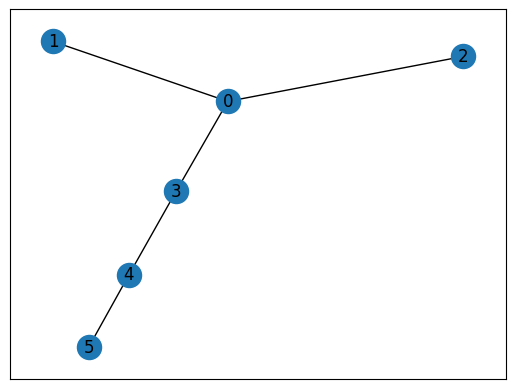

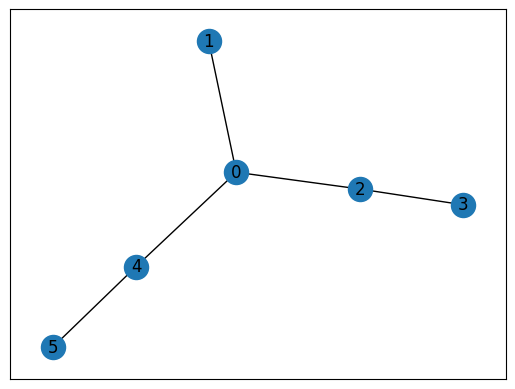

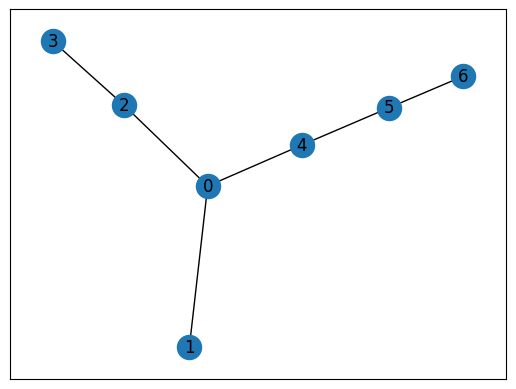

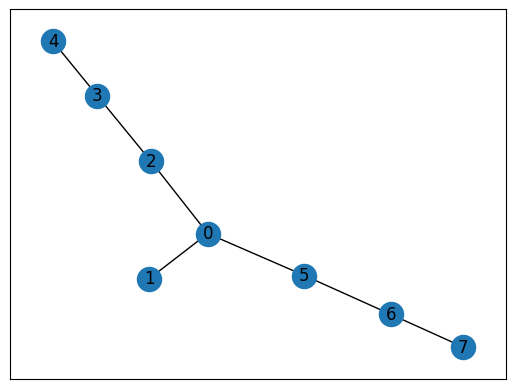

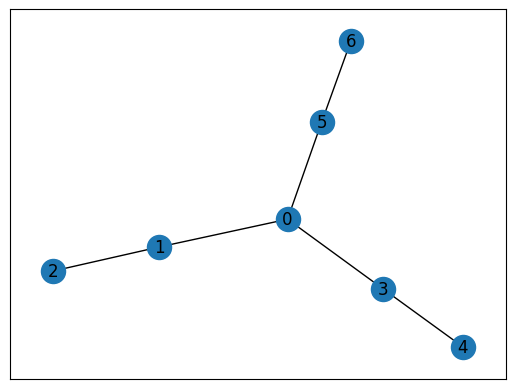

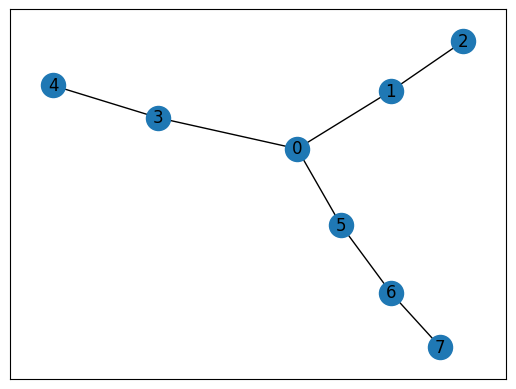

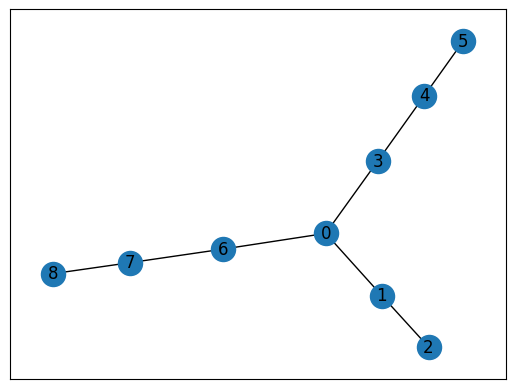

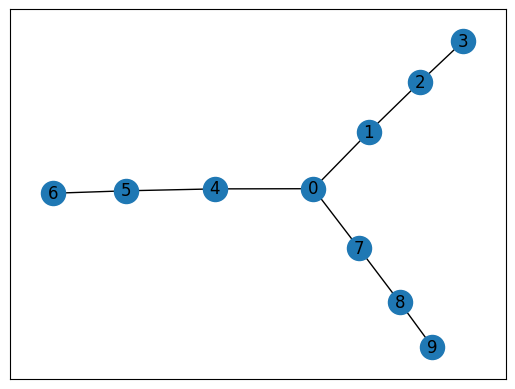

In [5]:
visualize_ensemble(Ensemble_SP1, Ensemble_SP1_weight)

# EMD function

In [6]:
def Calculate_EMD(ensembleP = None,
                  ensembleP_weight = None,
                  ensembleQ = None,
                  ensembleQ_weight = None,
                  alpha = 1,
                  use_calculated_GED = False,
                  calculated_GED_file_name = None,
                  print_details = False
                         ):

    Demand = {}
    Supply = {}
    T = {}

    ensembleP_number = len(ensembleP_weight)

    ensembleP_weight_sum = sum(ensembleP_weight)

    ensembleP_indexs = list(ensembleP.keys())
    ensembleP_indexs.sort(key=sortFunc)

    for i in range(0, ensembleP_number):

            Demand["P" + str(i+1)] = ensembleP_weight[i]/ensembleP_weight_sum

    ensembleQ_number = len(ensembleQ_weight)

    ensembleQ_weight_sum = sum(ensembleQ_weight)

    ensembleQ_indexs = list(ensembleQ.keys())
    ensembleQ_indexs.sort(key=sortFunc)


    for j in range(0, ensembleQ_number):

            Supply["Q" + str(j+1)]= ensembleQ_weight[j]/ensembleQ_weight_sum

    for i in range(0,ensembleP_number):

        for j in range(0, ensembleQ_number):

            if use_calculated_GED == False:

                GED_ij = unsup.edit_distance(ensembleP[ensembleP_indexs[i]],
                    ensembleQ[ensembleQ_indexs[j]],
                    node_attr = 'h',
                    edge_attr = 'e',
                    upper_bound = 100,
                    indel_mul=1,
                    sub_mul=1)
            else:
                GED_matrix = np.load(calculated_GED_file_name)
                GED_ij = GED_matrix[i,j]

            N_i = ensembleP[ensembleP_indexs[i]].number_of_nodes()

            N_j = ensembleQ[ensembleQ_indexs[j]].number_of_nodes()

            T[("P"+str(i+1),"Q"+str(j+1))] = 1-np.exp(-alpha*GED_ij/(0.5*(N_i+N_j)))

    # Step 0: Create an instance of the model
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    # Step 1: Define index sets
    CUS = list(Demand.keys())
    SRC = list(Supply.keys())

    # Step 2: Define the decision
    model.x = Var(CUS, SRC, domain = NonNegativeReals)

    # Step 3: Define Objective
    model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

    # Step 4: Constraints
    model.src = ConstraintList()
    for s in SRC:
        model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])

    model.dmd = ConstraintList()
    for c in CUS:
        model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

    results = SolverFactory('cbc').solve(model)

    if 'ok' == str(results.Solver.status):
        if print_details == True:
            for s in SRC:
                for c in CUS:
                    if model.x[c,s]() > 0:
                        print("Ship from ", s," to ", c, ":",
                              model.x[c,s](),"*" ,T[c,s])
        return model.Cost()

    else:
        print("No Valid Solution Found")
        return False

# The calculation of EMD and S

## The calculation of EMD and S between SP-1 and SP-3

In [13]:
EMD_1_3 = Calculate_EMD(
      ensembleP = Ensemble_SP1,
      ensembleP_weight = Ensemble_SP1_weight,
      ensembleQ = Ensemble_SP3,
      ensembleQ_weight = Ensemble_SP3_weight,
      alpha = 1,
      print_details = False)

print("EMD(SP1,SP3) = ", EMD_1_3)
print("S(SP1,SP3) = ", 1-EMD_1_3)

EMD(SP1,SP3) =  0.37325721910535353
S(SP1,SP3) =  0.6267427808946464


The GED calculation is really slow. We store the GED calculation results which can be directly used to speed up the ensemble pairwise similarity calculation.

In [12]:
EMD_1_3 = Calculate_EMD(
      ensembleP = Ensemble_SP1,
      ensembleP_weight = Ensemble_SP1_weight,
      ensembleQ = Ensemble_SP3,
      ensembleQ_weight = Ensemble_SP3_weight,
      use_calculated_GED = True,
      calculated_GED_file_name = "./dataset/Example3/SP_GED/SP1_SP3_GED.npy",
      alpha = 1,
      print_details = False)

print("EMD(SP1,SP3) = ", EMD_1_3)
print("S(SP1,SP3) = ", 1-EMD_1_3)

EMD(SP1,SP3) =  0.37325721910535353
S(SP1,SP3) =  0.6267427808946464


In [8]:
S_matrix = np.ones([8,8])
print(S_matrix)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [9]:
Example3_Ensembles = [Ensemble_SP1,
                      Ensemble_SP2,
                      Ensemble_SP3,
                      Ensemble_SP4,
                      Ensemble_SP5,
                      Ensemble_SP6,
                      Ensemble_SP7,
                      Ensemble_SP8]

Example3_Ensembles_weights = [Ensemble_SP1_weight,
                              Ensemble_SP2_weight,
                              Ensemble_SP3_weight,
                              Ensemble_SP4_weight,
                              Ensemble_SP5_weight,
                              Ensemble_SP6_weight,
                              Ensemble_SP7_weight,
                              Ensemble_SP8_weight]

In [18]:
for i in range(0,7):

    for j in range(i+1,8):

        EMD_ij = Calculate_EMD(ensembleP = Example3_Ensembles[i],
                         ensembleP_weight = Example3_Ensembles_weights[i],
                         ensembleQ = Example3_Ensembles[j],
                         ensembleQ_weight = Example3_Ensembles_weights[j],
                         use_calculated_GED = True,
                         calculated_GED_file_name = f"./dataset/Example3/SP_GED/SP{i+1}_SP{j+1}_GED.npy",

                         alpha = 1,
                         print_details = False)

        S_ij = 1-EMD_ij

        print(f"EMD(SP{i+1},SP{j+1}) = ", EMD_ij)
        print(f"S(SP{i+1},SP{j+1}) = ", S_ij)
        print('\n')

        S_matrix[i,j] = S_ij
        S_matrix[j,i] = S_ij


EMD(SP1,SP2) =  0.43133884828563085
S(SP1,SP2) =  0.5686611517143692


EMD(SP1,SP3) =  0.37325721910535353
S(SP1,SP3) =  0.6267427808946464


EMD(SP1,SP4) =  0.667864865227938
S(SP1,SP4) =  0.332135134772062


EMD(SP1,SP5) =  0.3808004108004719
S(SP1,SP5) =  0.6191995891995281


EMD(SP1,SP6) =  0.630985300210116
S(SP1,SP6) =  0.369014699789884


EMD(SP1,SP7) =  0.5950911203950695
S(SP1,SP7) =  0.4049088796049305


EMD(SP1,SP8) =  0.7704304464101658
S(SP1,SP8) =  0.22956955358983422


EMD(SP2,SP3) =  0.3333663391249171
S(SP2,SP3) =  0.6666336608750829


EMD(SP2,SP4) =  0.3996546542831171
S(SP2,SP4) =  0.6003453457168829


EMD(SP2,SP5) =  0.6309853002101159
S(SP2,SP5) =  0.3690146997898841


EMD(SP2,SP6) =  0.3967018852117976
S(SP2,SP6) =  0.6032981147882024


EMD(SP2,SP7) =  0.5903517964178133
S(SP2,SP7) =  0.4096482035821867


EMD(SP2,SP8) =  0.6169804097703139
S(SP2,SP8) =  0.3830195902296861


EMD(SP3,SP4) =  0.45563592764304817
S(SP3,SP4) =  0.5443640723569518


EMD(SP3,SP5) =  0.59

## The result of the pairwise ensemble similarity for these eight star polymer ensembles.

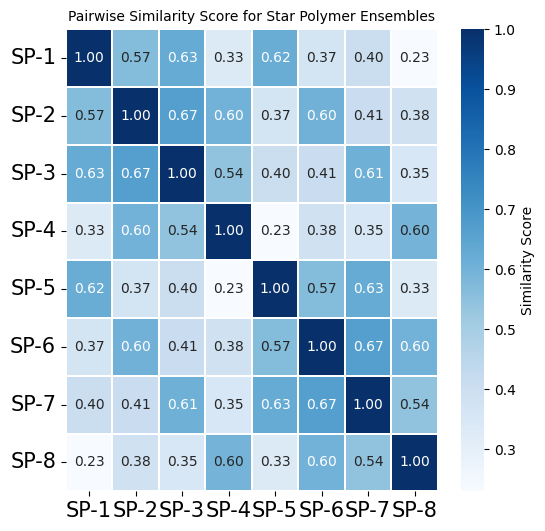

In [17]:
fig, ax = plt.subplots(figsize=(6,6),sharey=True )

x_labels = ["SP-1", "SP-2", "SP-3", "SP-4", "SP-5", "SP-6", "SP-7", "SP-8", ]
y_labels = ["SP-1", "SP-2", "SP-3", "SP-4", "SP-5", "SP-6", "SP-7", "SP-8", ]

sns.heatmap(S_matrix, linewidth = 0.3, annot = True, fmt = ".2f" , cmap = "Blues", cbar_kws = {'label': 'Similarity Score'})
ax.set_title(r"Pairwise Similarity Score for Star Polymer Ensembles", fontsize=10)
ax.set_xticklabels(x_labels, rotation = 0, fontsize = 15,horizontalalignment = 'center')
ax.set_yticklabels(y_labels, rotation = 360, fontsize = 15, horizontalalignment = 'right')

plt.show()